In [1]:
# Get rid of annoying tf warning
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import pickle
import numpy as np
np.set_printoptions(suppress=True)

import bayesflow as beef
import tensorflow as tf

import sys
sys.path.append("../")
from experiment import ModelComparisonExperiment

/home/divergence/anaconda3/envs/bfPower/lib/python3.10/site-packages/bayesflow/trainers.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# gpu setting and checking
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
experiment = ModelComparisonExperiment()

INFO:root:Trainer initialization: No generative model provided. Only offline learning mode is available!
INFO:root:Loaded loss history from ../checkpoints/tempdim_128_sumdim_128_epochs_100_batchsize_16_dense_PMP_128/history_26.pkl.
INFO:root:Networks loaded from ../checkpoints/tempdim_128_sumdim_128_epochs_100_batchsize_16_dense_PMP_128/ckpt-26


In [4]:
TRAIN_NETWORK = False

# Training

In [5]:
if TRAIN_NETWORK:
    with open('../data/training_data.pkl', 'rb') as f:
        training_data = pickle.load(f)
    with open('../data/validation_data.pkl', 'rb') as f:
        training_validation_data = pickle.load(f)
        
    history = experiment.run(
        training_data=training_data,
        validation_data=None
    )

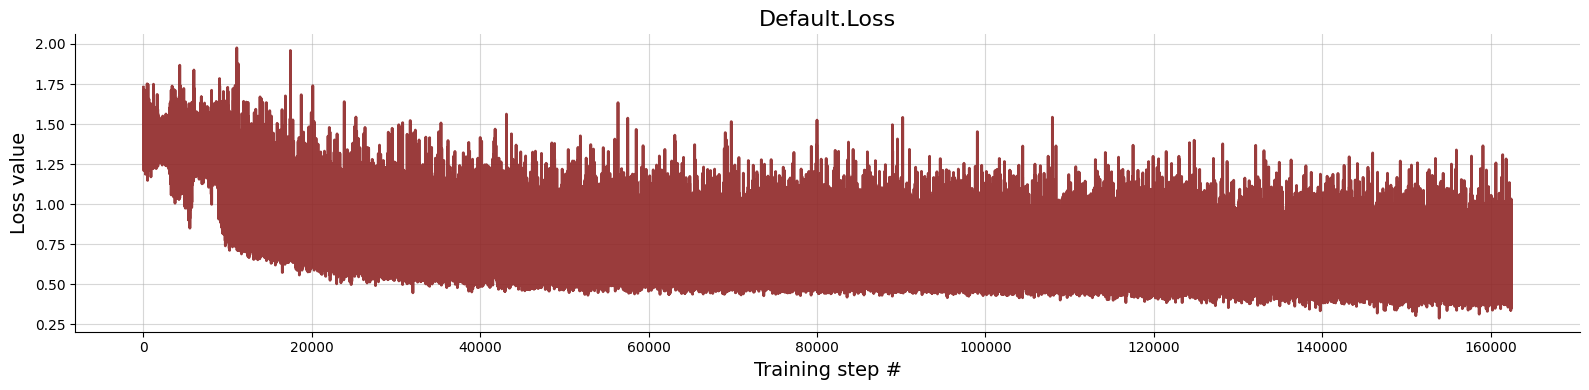

In [6]:

f = beef.diagnostics.plot_losses(experiment.trainer.loss_history.get_plottable())

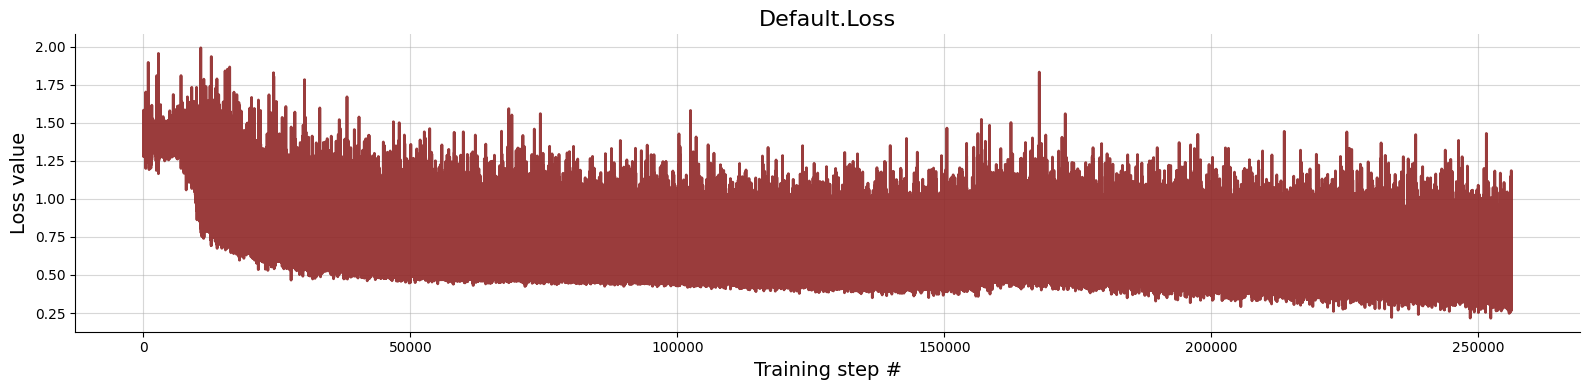

In [6]:
# template_dim_128, summary_dim_128 dropout_prob_01, 25 epochs, 16 batchsize, dense_pmp_128
f = beef.diagnostics.plot_losses(experiment.trainer.loss_history.get_plottable())

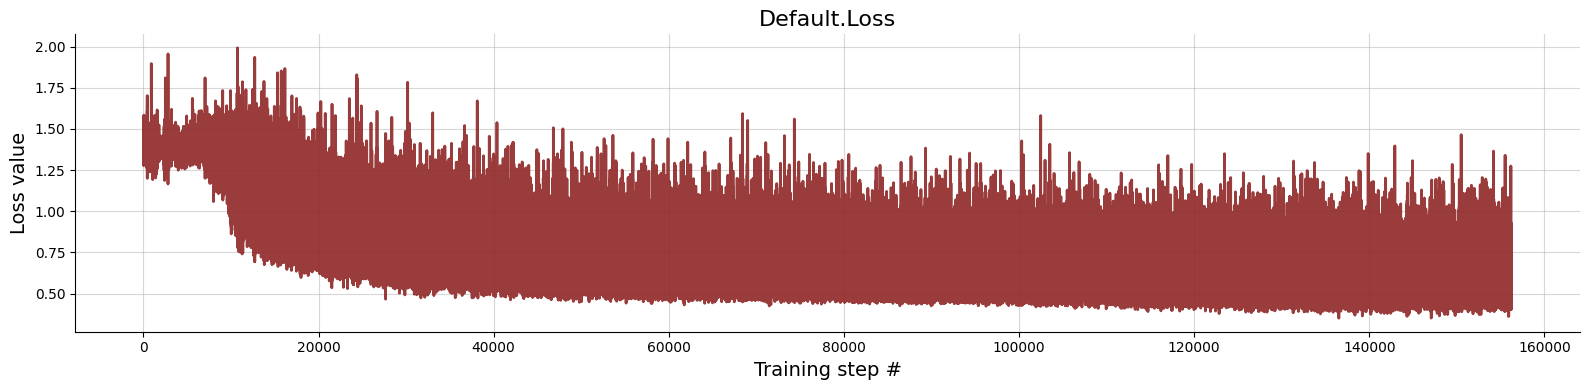

In [6]:
# template_dim_128, summary_dim_128 dropout_prob_01, 25 epochs, 16 batchsize, dense_pmp_128
f = beef.diagnostics.plot_losses(experiment.trainer.loss_history.get_plottable())

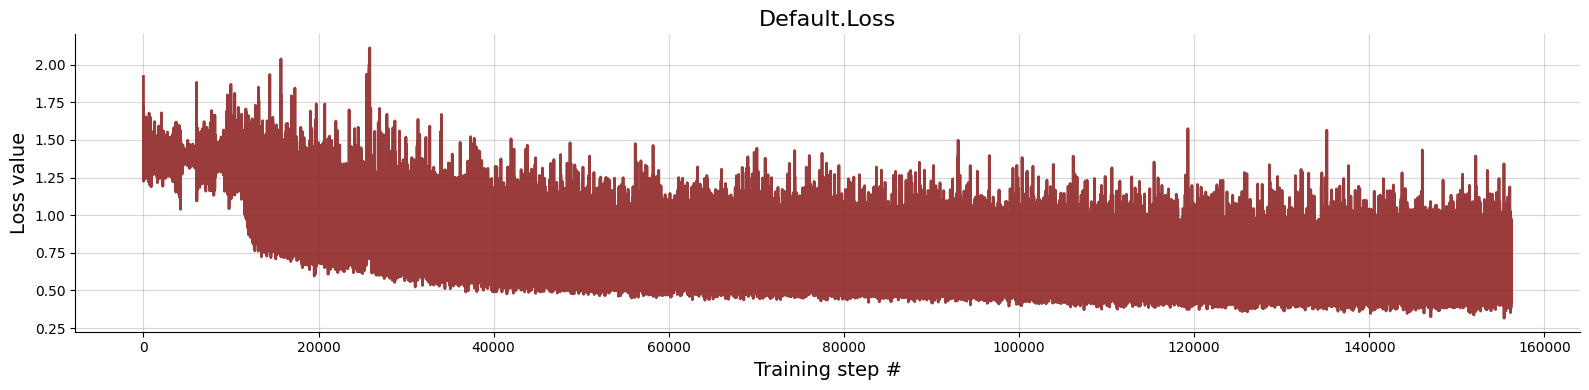

In [6]:
# template_dim_128, summary_dim_128 dropout_prob_01, 25 epochs, 16 batchsize
f = beef.diagnostics.plot_losses(experiment.trainer.loss_history.get_plottable())

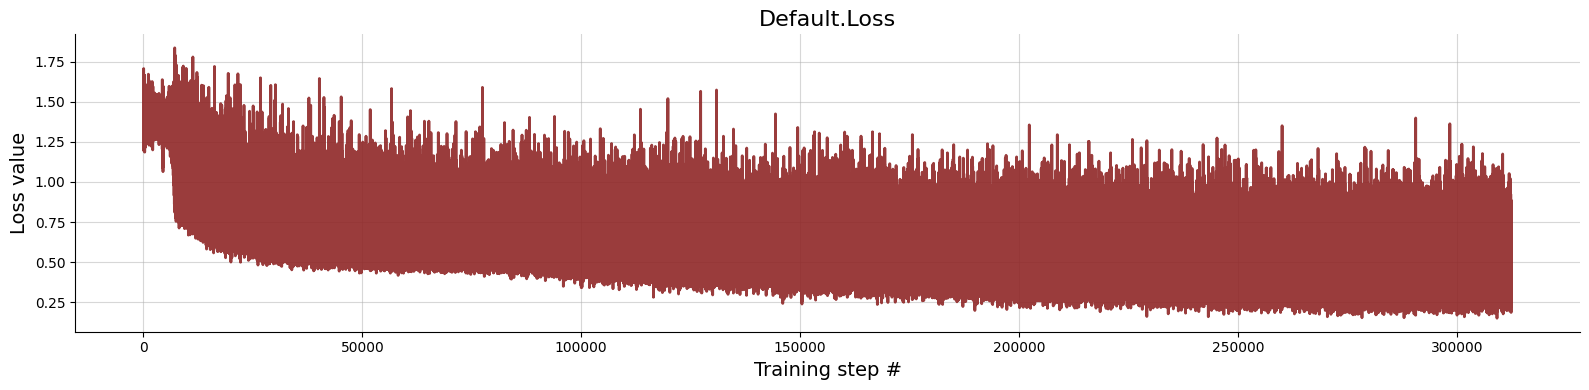

In [6]:
# template_dim_128_dropout_prob_01, 50 epochs, 16 batchsize
f = beef.diagnostics.plot_losses(experiment.trainer.loss_history.get_plottable())

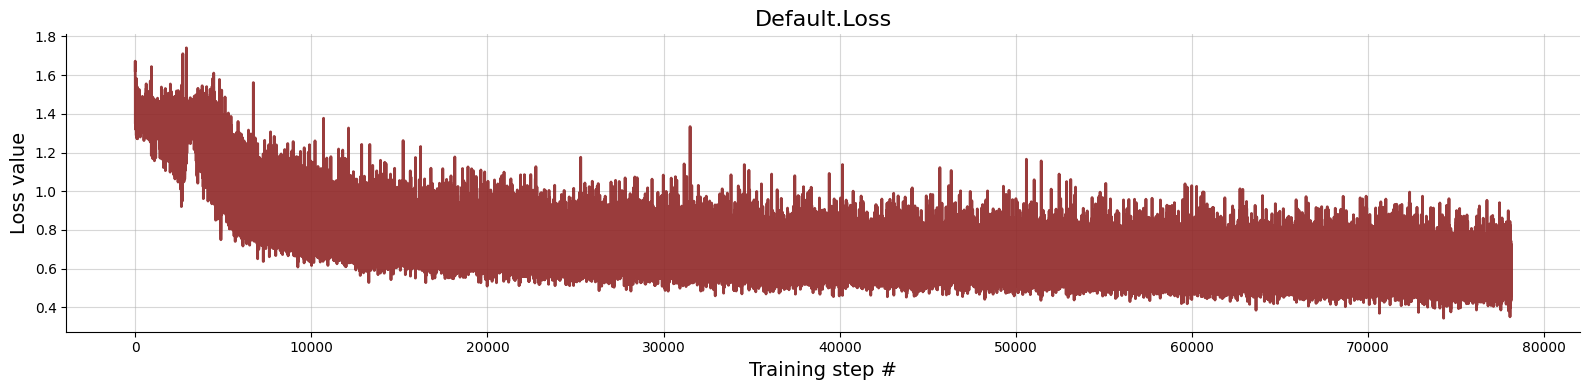

In [6]:
# template_dim_128_dropout_prob_01, 25 epochs, 32 batchsize
f = beef.diagnostics.plot_losses(experiment.trainer.loss_history.get_plottable())

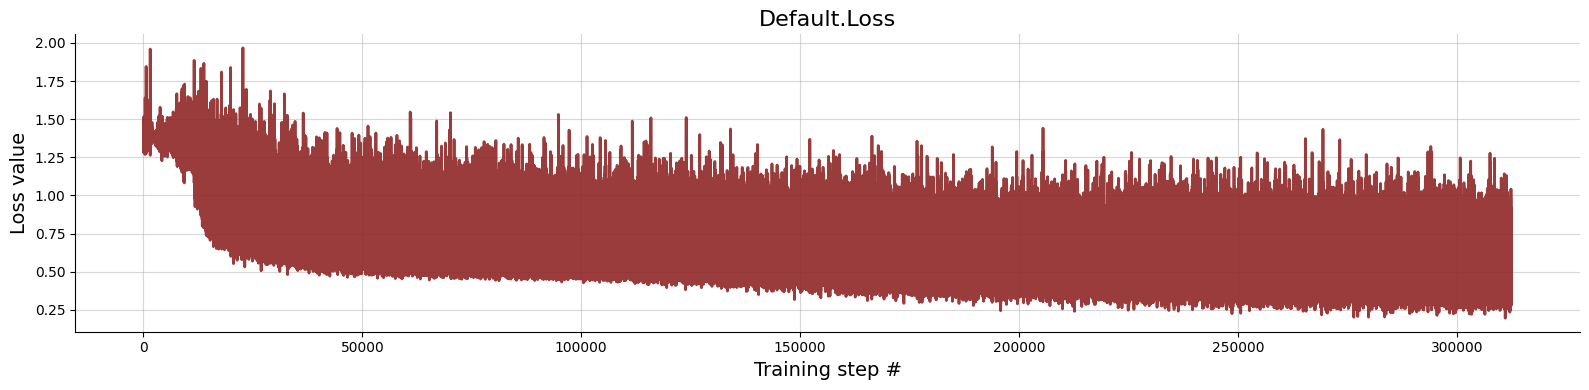

In [6]:
f = beef.diagnostics.plot_losses(experiment.trainer.loss_history.get_plottable())

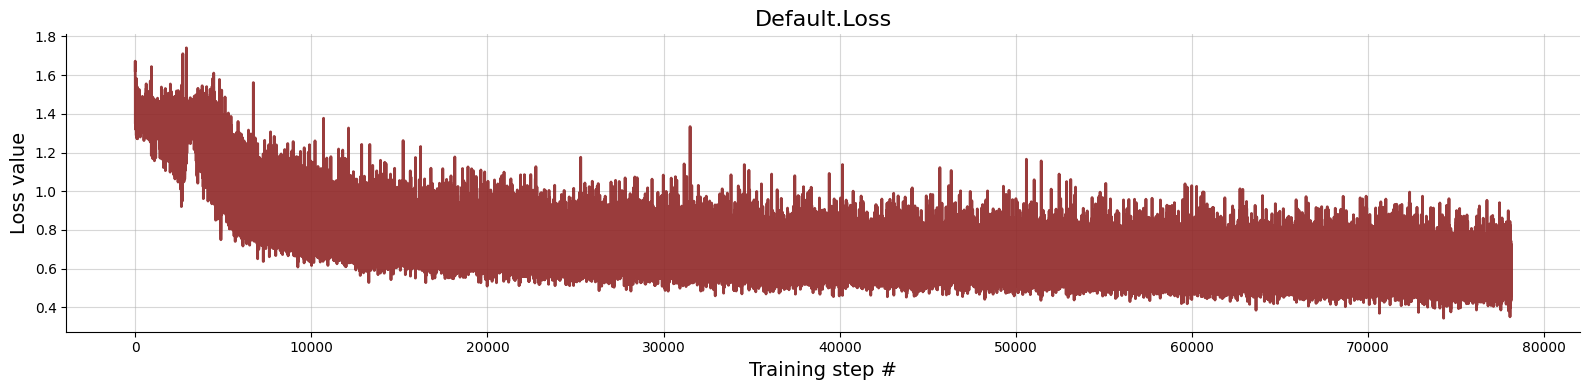

In [6]:
f = beef.diagnostics.plot_losses(experiment.trainer.loss_history.get_plottable())

# Validation

In [7]:
with open('../data/validation_data.pkl', 'rb') as f:
    validation_data = pickle.load(f)

In [8]:
configurator = beef.configuration.DefaultModelComparisonConfigurator(4)

In [9]:
model_probs = np.zeros((40000, 4))
chunks = np.arange(0, 10001, 200)
for i in range(len(chunks)-1):
    sim_1 = {'sim_data': validation_data['model_outputs'][0]['sim_data'][chunks[i]:chunks[i+1]]}
    sim_2 = {'sim_data': validation_data['model_outputs'][1]['sim_data'][chunks[i]:chunks[i+1]]}
    sim_3 = {'sim_data': validation_data['model_outputs'][2]['sim_data'][chunks[i]:chunks[i+1]]}
    sim_4 = {'sim_data': validation_data['model_outputs'][3]['sim_data'][chunks[i]:chunks[i+1]]}
    
    tmp_validation_data = {
        'model_outputs': [sim_1, sim_2, sim_3, sim_4],
        'model_indices': validation_data['model_indices']
    }
    
    tmp_validation_data_configured = configurator(tmp_validation_data)
    with tf.device('/cpu:0'):
        model_probs[(chunks[i]*4):(chunks[i+1]*4)] = experiment.amortizer.posterior_probs(
            tmp_validation_data_configured
        )

In [10]:
model_indices = tf.one_hot(np.tile(np.repeat([0, 1, 2, 3], 200), 50), 4)

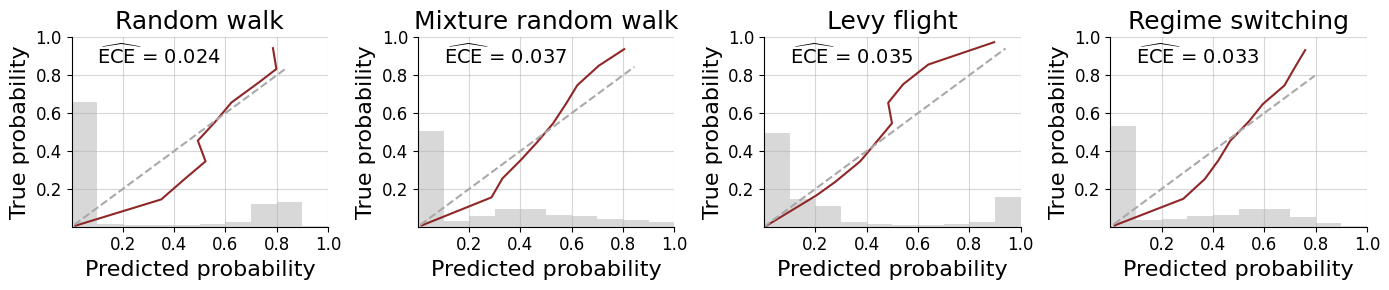

In [11]:
# dense_pmp_128
cal_curves = beef.diagnostics.plot_calibration_curves(
    true_models=model_indices,
    pred_models=model_probs,
    model_names=['Random walk',
                 'Mixture random walk',
                 'Levy flight',
                 'Regime switching'],
    fig_size=(14, 3)
)

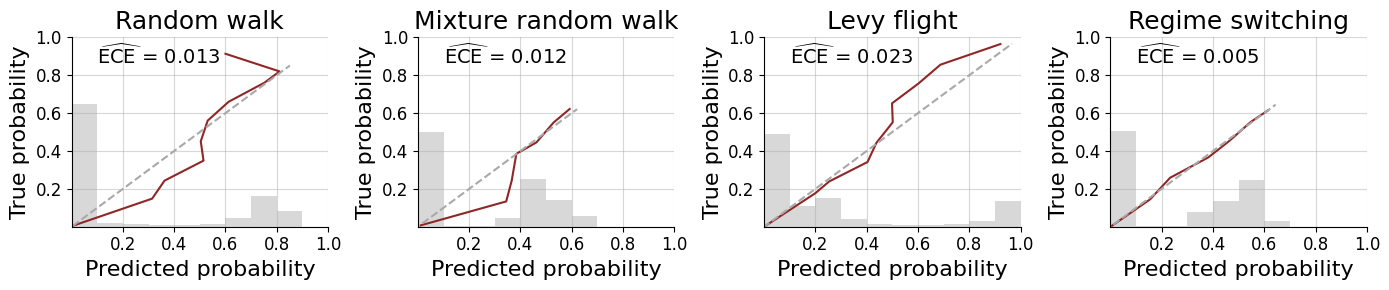

In [11]:
# dense_pmp_128
cal_curves = beef.diagnostics.plot_calibration_curves(
    true_models=model_indices,
    pred_models=model_probs,
    model_names=['Random walk',
                 'Mixture random walk',
                 'Levy flight',
                 'Regime switching'],
    fig_size=(14, 3)
)

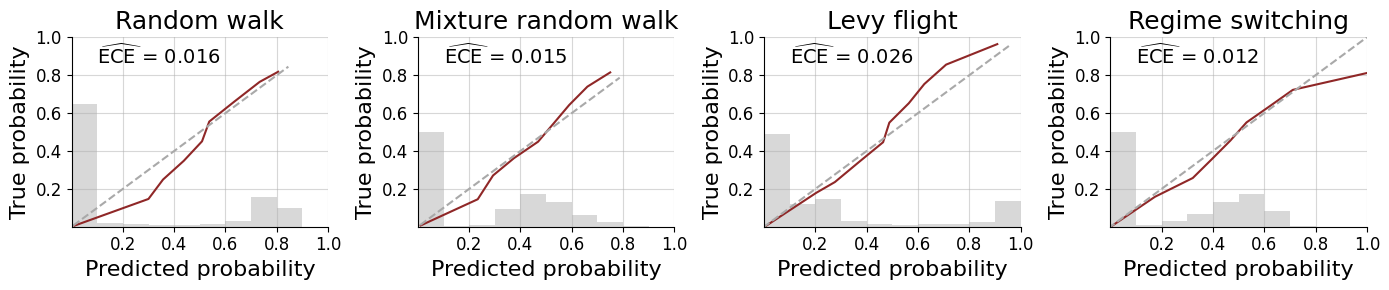

In [11]:
cal_curves = beef.diagnostics.plot_calibration_curves(
    true_models=model_indices,
    pred_models=model_probs,
    model_names=['Random walk',
                 'Mixture random walk',
                 'Levy flight',
                 'Regime switching'],
    fig_size=(14, 3)
)

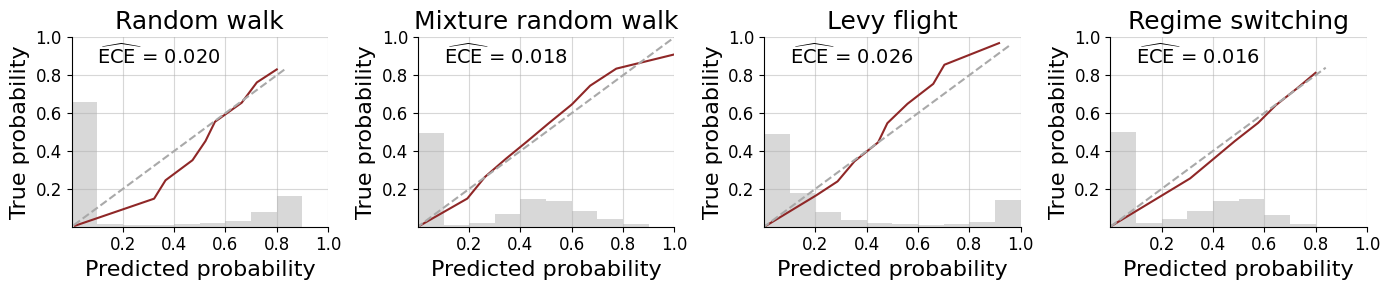

In [11]:
cal_curves = beef.diagnostics.plot_calibration_curves(
    true_models=model_indices,
    pred_models=model_probs,
    model_names=['Random walk',
                 'Mixture random walk',
                 'Levy flight',
                 'Regime switching'],
    fig_size=(14, 3)
)

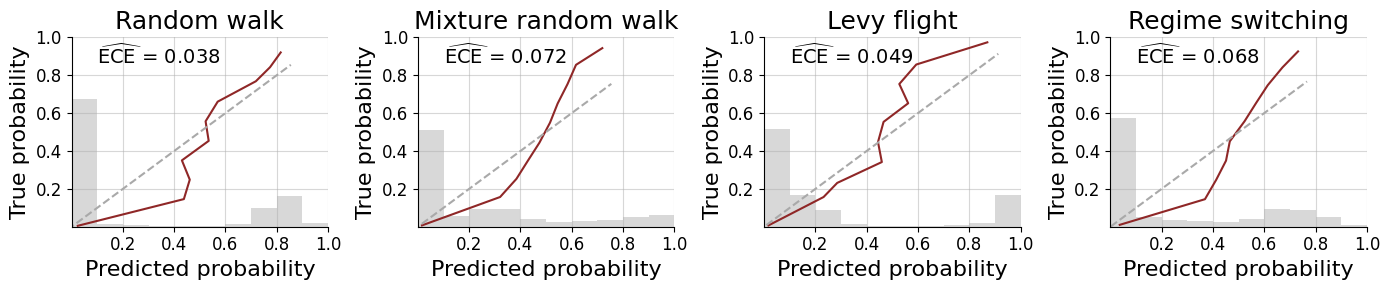

In [11]:
# template_dim_128_dropout_prob_01, 50 epochs, 16 batchsize
cal_curves = beef.diagnostics.plot_calibration_curves(
    true_models=model_indices,
    pred_models=model_probs,
    model_names=['Random walk',
                 'Mixture random walk',
                 'Levy flight',
                 'Regime switching'],
    fig_size=(14, 3)
)

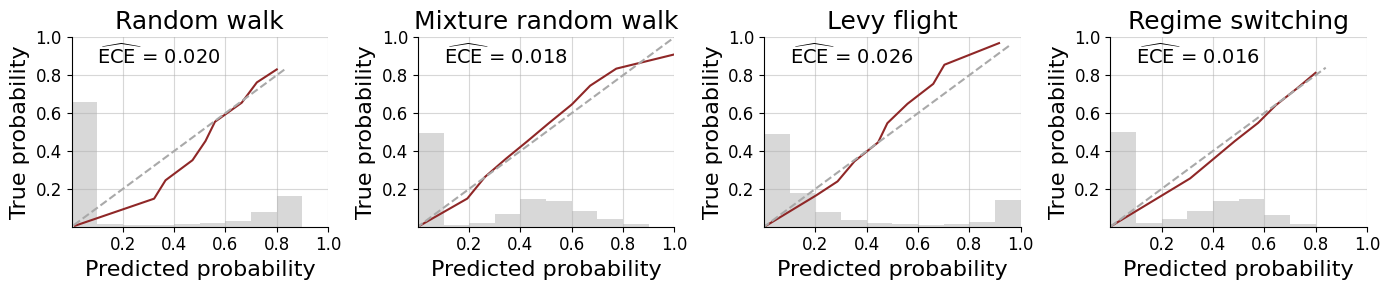

In [11]:
cal_curves = beef.diagnostics.plot_calibration_curves(
    true_models=model_indices,
    pred_models=model_probs,
    model_names=['Random walk',
                 'Mixture random walk',
                 'Levy flight',
                 'Regime switching'],
    fig_size=(14, 3)
)

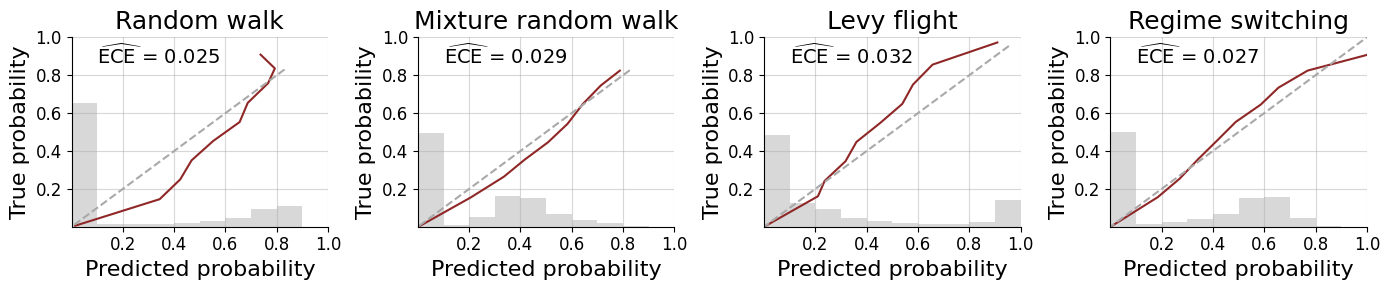

In [10]:
cal_curves = beef.diagnostics.plot_calibration_curves(
    true_models=model_indices,
    pred_models=model_probs,
    model_names=['Random walk',
                 'Mixture random walk',
                 'Levy flight',
                 'Regime switching'],
    fig_size=(14, 3)
)

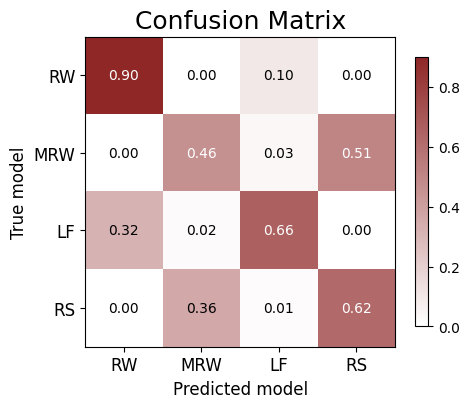

In [12]:
# dense_pmp128
confusion_matrix = beef.diagnostics.plot_confusion_matrix(
    model_indices,
    model_probs,
    model_names=['RW', 'MRW', 'LF', 'RS']
)

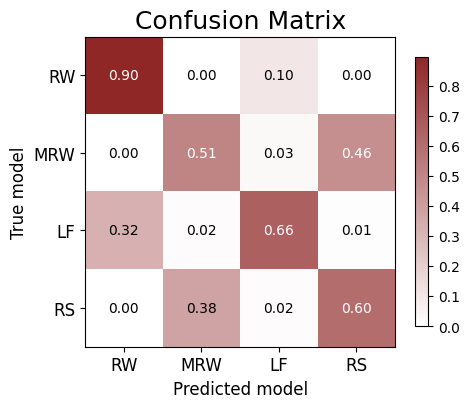

In [12]:

confusion_matrix = beef.diagnostics.plot_confusion_matrix(
    model_indices,
    model_probs,
    model_names=['RW', 'MRW', 'LF', 'RS']
)

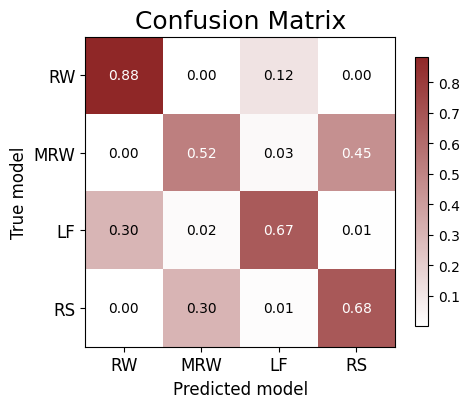

In [12]:
# template_dim_128_dropout_prob_01, 50 epochs, 16 batchsize
confusion_matrix = beef.diagnostics.plot_confusion_matrix(
    model_indices,
    model_probs,
    model_names=['RW', 'MRW', 'LF', 'RS']
)

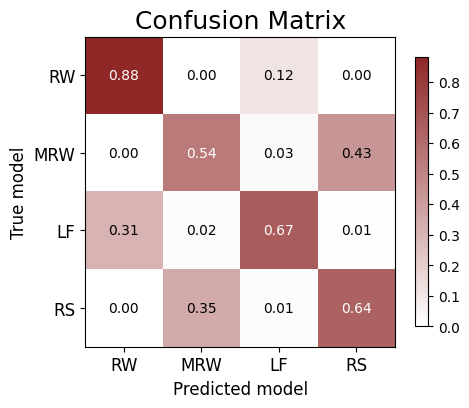

In [12]:
confusion_matrix = beef.diagnostics.plot_confusion_matrix(
    model_indices,
    model_probs,
    model_names=['RW', 'MRW', 'LF', 'RS']
)

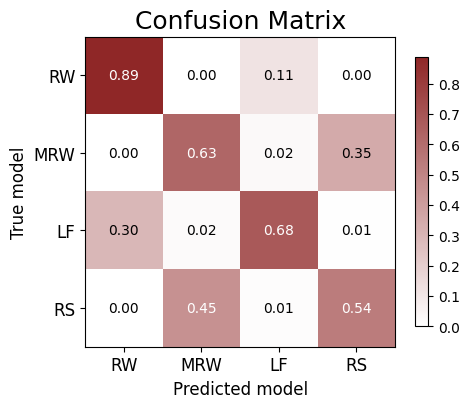

In [12]:
confusion_matrix = beef.diagnostics.plot_confusion_matrix(
    model_indices,
    model_probs,
    model_names=['RW', 'MRW', 'LF', 'RS']
)

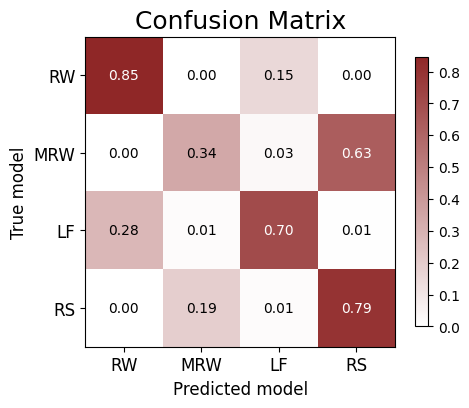

In [11]:
confusion_matrix = beef.diagnostics.plot_confusion_matrix(
    model_indices,
    model_probs,
    model_names=['RW', 'MRW', 'LF', 'RS']
)